In [1]:
#Fiz esse note pra tentar aplicar o código em um labirinto pequeno que fiz a mão 
#e para entender melhor o funcionamento do código disponibilizado tentando aplicar ao trabalho

In [2]:
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

In [4]:
#maze 5x5 da pasta 'Mazes'

#Custo = 1 para todas as conexões possiveis
#ações: direita, esquerda, baixo, cima - segui essa ordem pra montar o grafo
#não usa estado repetido

maze_map = UndirectedGraph(dict(
    l1c1 = dict(l1c2=1, l2c1=1),
    l1c2 = dict(l1c3=1, l2c2=1),
    l2c1 = dict(l2c2=1),
    l2c2 = dict(l3c2=1),
    l3c2 = dict(l3c3=1),
    l3c3 = dict(l3c4=1),
    l3c4 = dict(l3c5=1),
    l3c5 = dict(l2c5=1, l4c5=1),
    l4c5 = dict(l5c5=1),
    l5c5 = dict(l5c4=1),
    l5c4 = dict(l5c3=1),
    l5c3 = dict(l5c2=1),
    l5c2 = dict(l5c1=1)))

maze_map.locations = dict(
    l1c1 = (90, 410), l1c2 = (92, 410), l1c3 = (94, 410),
    l2c1 = (90, 412), l2c2 = (92, 412), l2c5 = (98, 412),
    l3c2 = (92, 414), l3c3 = (94, 414), l3c4 = (96, 414), l3c5 = (98, 414),
    l4c5 = (98, 416),
    l5c1 = (90, 418), l5c2 = (92, 418), l5c3 = (94, 418), l5c4 = (96, 418), l5c5 = (98, 418)
)

In [5]:
maze_problem = GraphProblem('l1c1', 'l5c5', maze_map)

In [6]:
#Só pra conferir se esta ok
maze_locations = maze_map.locations
print(maze_locations)

{'l1c3': (94, 410), 'l2c1': (90, 412), 'l4c5': (98, 416), 'l5c3': (94, 418), 'l5c1': (90, 418), 'l3c3': (94, 414), 'l3c2': (92, 414), 'l2c5': (98, 412), 'l1c1': (90, 410), 'l5c5': (98, 418), 'l3c4': (96, 414), 'l2c2': (92, 412), 'l5c2': (92, 418), 'l1c2': (92, 410), 'l5c4': (96, 418), 'l3c5': (98, 414)}


In [7]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in maze_map.locations.keys()}
node_positions = maze_map.locations
node_label_pos = { k:[v[0],v[1]]  for k,v in maze_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in maze_map.graph_dict.items() for k2, v2 in v.items()}

maze_graph_data = {  'graph_dict' : maze_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

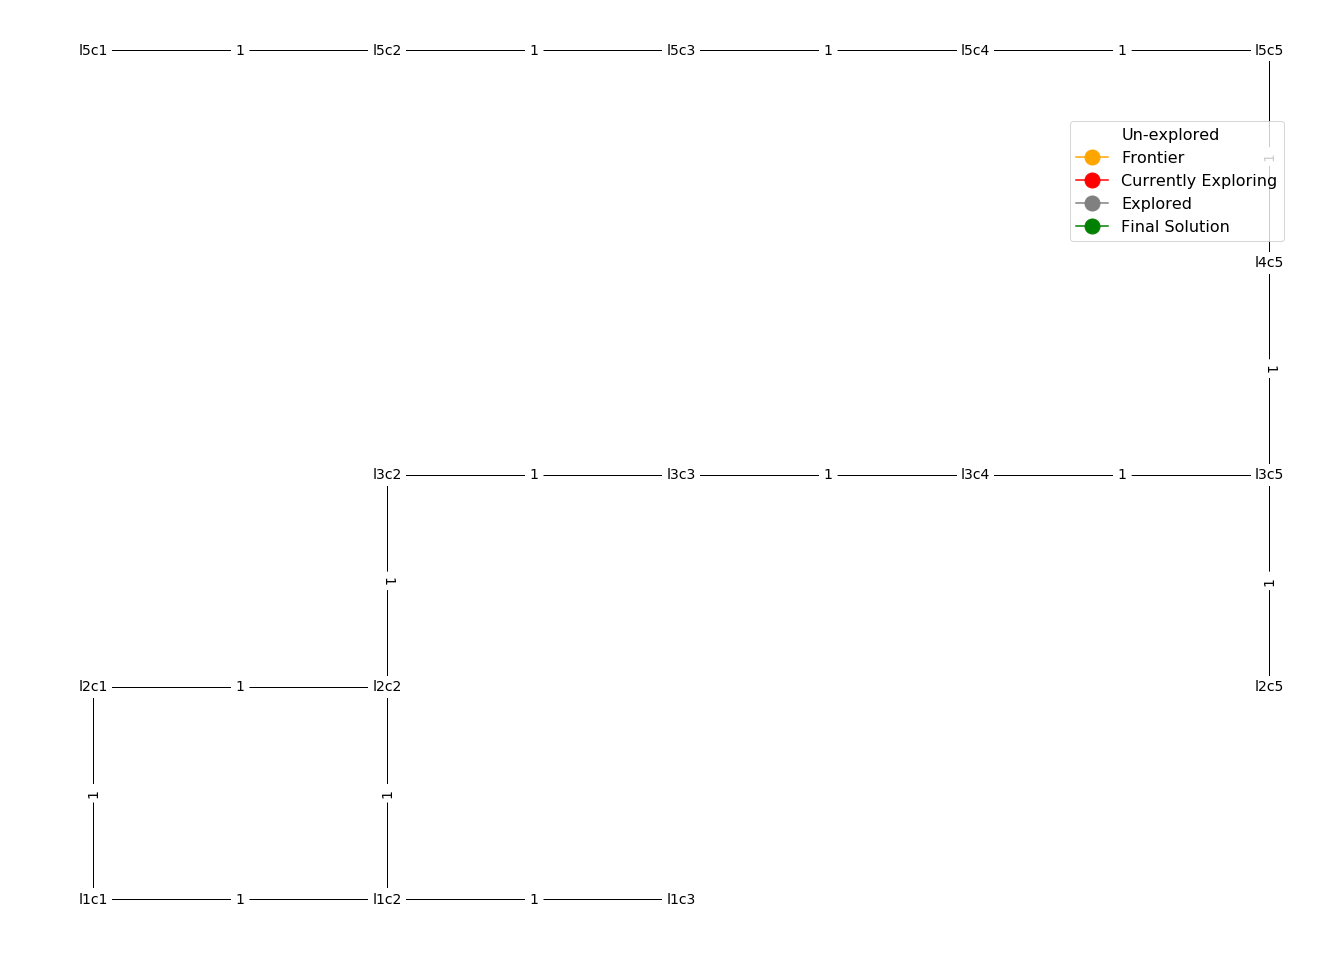

In [8]:
show_map(maze_graph_data)#não sei pq fica tão grande --ja tentei mudar o tamanho

In [9]:
def breadth_first_search_graph(problem):
    "[Figure 3.11]"
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = deque([node])
    
    # modify the color of frontier nodes to blue
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
        
    explored = set()
    while frontier:
        node = frontier.popleft()
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        explored.add(node.state)     
        
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    node_colors[child.state] = "green"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    return(iterations, all_node_colors, child)
                frontier.append(child)

                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
                    
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

In [10]:
iterations, all_node_colors, child = breadth_first_search_graph(maze_problem)
child.solution()

['l2c1', 'l2c2', 'l3c2', 'l3c3', 'l3c4', 'l3c5', 'l4c5', 'l5c5']